In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [4]:
train = pd.read_csv('../input/digit-recognizer/train.csv')

labels = train['label'].values.reshape(-1,1)
print(labels)

[[1]
 [0]
 [1]
 ...
 [7]
 [6]
 [9]]


In [5]:
images = train.values[:, 1:]
images = images.reshape(images.shape[0], 28, 28)
images.shape

(42000, 28, 28)

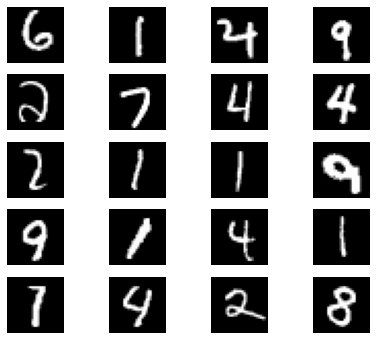

In [6]:
def disp_random_images(rows, cols):
    fig = plt.figure(figsize=(rows+2, cols+2))
    for i in range(rows*cols):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[np.random.randint(images.shape[0]), :, :], cmap=cm.gray, vmin=0, vmax=255)
        plt.axis('off')
    plt.show()
disp_random_images(5,4)

In [40]:
from sklearn.model_selection import train_test_split

normalize = True #set true to enable normalization

if normalize:
    norm_factor = 255
else:
    norm_factor = 1

x_train, x_cv, y_train, y_cv = train_test_split(train.values[:,1:]/norm_factor, train['label'].values, test_size=1/42)
print(x_train.shape, x_cv.shape, y_train.shape, y_cv.shape)

(41000, 784) (1000, 784) (41000,) (1000,)


In [41]:
print(x_train.shape, x_cv.shape, y_train.shape, y_cv.shape)

(41000, 784) (1000, 784) (41000,) (1000,)


In [93]:
#Reshaping to match input shape for neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_cv = x_cv.reshape(x_cv.shape[0], 28, 28, 1)

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

In [96]:
model = Sequential([
    Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters = 32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                12816     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [98]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = sparse_categorical_crossentropy, metrics = ['accuracy'])

In [99]:
model.fit(x = x_train, y = y_train, 
          batch_size = 10, 
          epochs = 15, 
          validation_data = (x_cv, y_cv), 
          shuffle = True, 
          verbose = 2
         )

Epoch 1/15
4100/4100 - 28s - loss: 0.5806 - accuracy: 0.8250 - val_loss: 0.2158 - val_accuracy: 0.9300
Epoch 2/15
4100/4100 - 27s - loss: 0.1683 - accuracy: 0.9497 - val_loss: 0.1487 - val_accuracy: 0.9520
Epoch 3/15
4100/4100 - 27s - loss: 0.1212 - accuracy: 0.9639 - val_loss: 0.1159 - val_accuracy: 0.9630
Epoch 4/15
4100/4100 - 28s - loss: 0.1006 - accuracy: 0.9694 - val_loss: 0.0961 - val_accuracy: 0.9720
Epoch 5/15
4100/4100 - 27s - loss: 0.0874 - accuracy: 0.9735 - val_loss: 0.0865 - val_accuracy: 0.9700
Epoch 6/15
4100/4100 - 27s - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.1027 - val_accuracy: 0.9680
Epoch 7/15
4100/4100 - 27s - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.0744 - val_accuracy: 0.9790
Epoch 8/15
4100/4100 - 27s - loss: 0.0658 - accuracy: 0.9792 - val_loss: 0.0640 - val_accuracy: 0.9810
Epoch 9/15
4100/4100 - 27s - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0646 - val_accuracy: 0.9820
Epoch 10/15
4100/4100 - 27s - loss: 0.0568 - accuracy: 0.9828 - val_loss:

In [104]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
test_images = test.values.reshape(test.shape[0], 28, 28)
test = test.values.reshape(test.shape[0], 28, 28, 1)/norm_factor

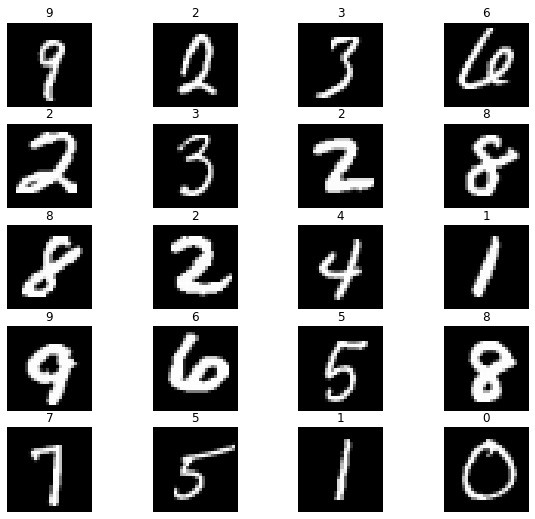

In [114]:
def disp_test_images(rows, cols):
    fig = plt.figure(figsize=(rows+5, cols+5))
    for i in range(rows*cols):
        fig.add_subplot(rows, cols, i+1)
        ridx = np.random.randint(test_images.shape[0])
        plt.imshow(test_images[ridx, :, :], cmap=cm.gray, vmin=0, vmax=255)
        title = str(np.argmax(model.predict(test[ridx, :].reshape(1,28,28,1)), axis=1).squeeze())
        plt.title(title)
        plt.axis('off')
    plt.show()
disp_test_images(5,4)

In [116]:
predictions = model.predict(x = test, batch_size=10, verbose=0)
print(predictions.shape)
pred = np.argmax(predictions, axis=1)
print(pred.shape)

(28000, 10)
(28000,)


In [117]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

In [118]:
sub['Label'] = pred

In [ ]:
sub

In [120]:
sub.to_csv('submission.csv', index=False)

In [121]:
model.save('custom_conv_net.h5')